In [1]:
import pandas as pd

In [3]:
iris = pd.read_csv('iris.data', header=None, encoding='utf-8')

In [4]:
iris.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

In [5]:
iris["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
iris[iris['species'] == 'Iris-virginica'];

In [14]:
X = iris.loc[:, ['sepal_length', 'petal_length']]

In [15]:
X
X1 = X.values
X1;

In [16]:
import matplotlib.pyplot as plt

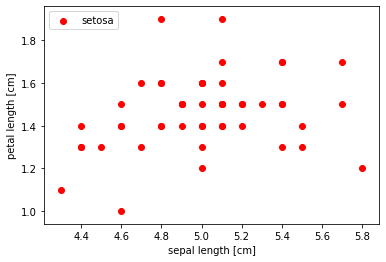

In [10]:
plt.scatter(X1[:50, 0], X1[:50, 1], color = 'red', marker = 'o', label = 'setosa')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()

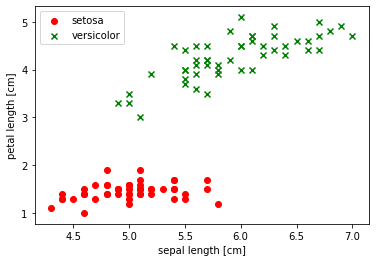

In [11]:
plt.scatter(X1[:50, 0], X1[:50, 1], color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X1[50:100, 0], X1[50:100, 1], color = 'green', marker = 'x', label = 'versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()

In [12]:
X_train = X[:40]

In [13]:
X_train = X_train.append(X[50:90])

In [14]:
len(X_train)

80

In [15]:


y = iris.loc[:100, 'species']

In [16]:
y

0          Iris-setosa
1          Iris-setosa
2          Iris-setosa
3          Iris-setosa
4          Iris-setosa
            ...       
96     Iris-versicolor
97     Iris-versicolor
98     Iris-versicolor
99     Iris-versicolor
100     Iris-virginica
Name: species, Length: 101, dtype: object

In [17]:
import numpy as np

In [18]:
y = np.where(y == 'Iris-setosa', -1, 1)

In [19]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [20]:
type(y)

numpy.ndarray

In [21]:
y_train = y[:40]
y_train = np.append(y_train, y[50:90])

In [22]:
y_train
len(y_train)

80

In [23]:
X_test = X[40:50]

In [24]:
X_test = X_test.append(X[90:100])

In [25]:
len(X_test)

20

In [26]:
y_test = y[40:50]
y_test = np.append(y_test, y[90:100])
len(y_test)

20

In [27]:
class Perceptron(object):
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit (self, X, y):
        self.w_ = [0.1, 0.2, 0.3]
        self.errors_ = []
        
        for i in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                for z in range(len(xi)):
                    self.w_[1+z] += update * xi[z]
                self.w_[0] += update
                if (update != 0.0):
                    errors += 1
            self.errors_.append(errors)
            print(f"errors = {errors} and iteration = {i}")
        return self

    def net_input (self, X):
        sum_ = 0
        for xi in range(len(X)):
            sum_ += X[xi] * self.w_[1 + xi]
        sum_ += self.w_[0]
        return sum_
    
    def predict (self, X):
        if self.net_input(X) >= 0.0:
            return 1
        else:
            return -1

In [28]:
ppn = Perceptron(eta = 0.5, n_iter = 10)

In [29]:
ppn.fit(X_train.values, y_train)

errors = 2 and iteration = 0
errors = 2 and iteration = 1
errors = 3 and iteration = 2
errors = 1 and iteration = 3
errors = 0 and iteration = 4
errors = 0 and iteration = 5
errors = 0 and iteration = 6
errors = 0 and iteration = 7
errors = 0 and iteration = 8
errors = 0 and iteration = 9


In [30]:
for i in range(20):
    if (y_test[i] != ppn.predict(X_test.iloc[i].values)):
        print("Error!")
    else:
        print("Correct")

Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Error!
Correct


In [31]:
ppn2 = Perceptron(eta = 0.1, n_iter = 10)
ppn2.fit(X_train.values, y_train)
for i in range(20):
    if (y_test[i] != ppn2.predict(X_test.iloc[i].values)):
        print("Error!")
    else:
        print("Correct")

errors = 2 and iteration = 0
errors = 2 and iteration = 1
errors = 1 and iteration = 2
errors = 0 and iteration = 3
errors = 0 and iteration = 4
errors = 0 and iteration = 5
errors = 0 and iteration = 6
errors = 0 and iteration = 7
errors = 0 and iteration = 8
errors = 0 and iteration = 9
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct


In [34]:
class PerceptronUniform(object):
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit (self, X, y):
        self.w_ = np.random.uniform(0, 1, size = 1+X.shape[1])
        # self.w_ = [0.1, 0.2, 0.3]
        self.errors_ = []
        
        for i in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                for z in range(len(xi)):
                    self.w_[1+z] += update * xi[z]
                self.w_[0] += update
                if (update != 0.0):
                    errors += 1
            self.errors_.append(errors)
            print(f"errors = {errors} and iteration = {i}")
        return self

    def net_input (self, X):
        sum_ = 0
        for xi in range(len(X)):
            sum_ += X[xi] * self.w_[1 + xi] # w0 is 1 at wo * X[xi] * self.w_
        sum_ += self.w_[0]
        return sum_
    
    def predict (self, X):
        if self.net_input(X) >= 0.0:
            return 1
        else:
            return -1

In [41]:
ppn3 = PerceptronUniform (eta = 0.01, n_iter = 2)
ppn3.fit(X_train.values, y_train)
for i in range(20):
    if (y_test[i] != ppn3.predict(X_test.iloc[i].values)):
        print("Error!")
    else:
        print("Correct")

errors = 6 and iteration = 0
errors = 0 and iteration = 1
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct


In [42]:
class PerceptronGaussian(object):
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit (self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X_train.shape[1])
        #self.w_ = np.random.uniform(0, 1, size = 1+X.shape[1])
        # self.w_ = [0.1, 0.2, 0.3]
        self.errors_ = []
        
        for i in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                for z in range(len(xi)):
                    self.w_[1+z] += update * xi[z]
                self.w_[0] += update
                if (update != 0.0):
                    errors += 1
            self.errors_.append(errors)
            print(f"errors = {errors} and iteration = {i}")
        return self

    def net_input (self, X):
        sum_ = 0
        for xi in range(len(X)):
            sum_ += X[xi] * self.w_[1 + xi]
        sum_ += self.w_[0]
        return sum_
    
    def predict (self, X):
        if self.net_input(X) >= 0.0:
            return 1
        else:
            return -1

In [44]:
ppn4 = PerceptronGaussian (eta = 0.01, n_iter = 20)
ppn4.fit(X_train.values, y_train)

errors = 1 and iteration = 0
errors = 3 and iteration = 1
errors = 3 and iteration = 2
errors = 2 and iteration = 3
errors = 1 and iteration = 4
errors = 0 and iteration = 5
errors = 0 and iteration = 6
errors = 0 and iteration = 7
errors = 0 and iteration = 8
errors = 0 and iteration = 9
errors = 0 and iteration = 10
errors = 0 and iteration = 11
errors = 0 and iteration = 12
errors = 0 and iteration = 13
errors = 0 and iteration = 14
errors = 0 and iteration = 15
errors = 0 and iteration = 16
errors = 0 and iteration = 17
errors = 0 and iteration = 18
errors = 0 and iteration = 19


In [45]:
for i in range(20):
    if (y_test[i] != ppn4.predict(X_test.iloc[i].values)):
        print("Error!")
    else:
        print("Correct")

Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct


In [47]:
y_test = y[40:50]

In [48]:
y_test

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [51]:
# compare setosa and virginica
X = iris.loc[:49, ['sepal_length', 'petal_length']]
X = X.append(iris.loc[100:, ['sepal_length', 'petal_length']])
len(X)

100

In [58]:
y = iris.loc[:49, 'species']
y = y.append(iris.loc[100:, 'species'])
len(y)
y = np.where (y == 'Iris-setosa', -1, 1)
print(y[99])

1


In [60]:
for i in range (100):
    if (y[i] != ppn4.predict(X.iloc[i].values)):
        print("Error!")
    else:
        print("Correct")

Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
